## Image Processing 09

Wirapat Prigphet (Gene) 620510618 <br/>
Suppapich Seetasith (Yale) 620510626 <br/>
Pakin Siwatammarat (Pirch) 620510677

### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Usefulness 




*   Image smoothing
*   Image sharpening
*   Edge detection



### Read an example image. Beautiful picture of einstein.



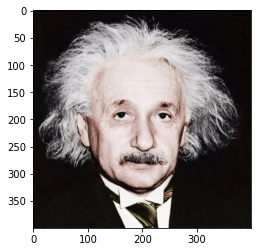

In [ ]:
img = plt.imread("image.jpg")/float(2**8)
plt.imshow(img)
plt.show()

### Before performing FFT on this beautiful image, I will create a draw_circle function that I will later use to trim the Frequency array generated by np.fft.fft2.

In [ ]:
shape = img.shape[:2]

def draw_cicle(shape,diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)


TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=100)
TFcircleOUT  = ~TFcircleIN

fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT,cmap="gray")
plt.colorbar(im)
plt.show()

Diameter = 10

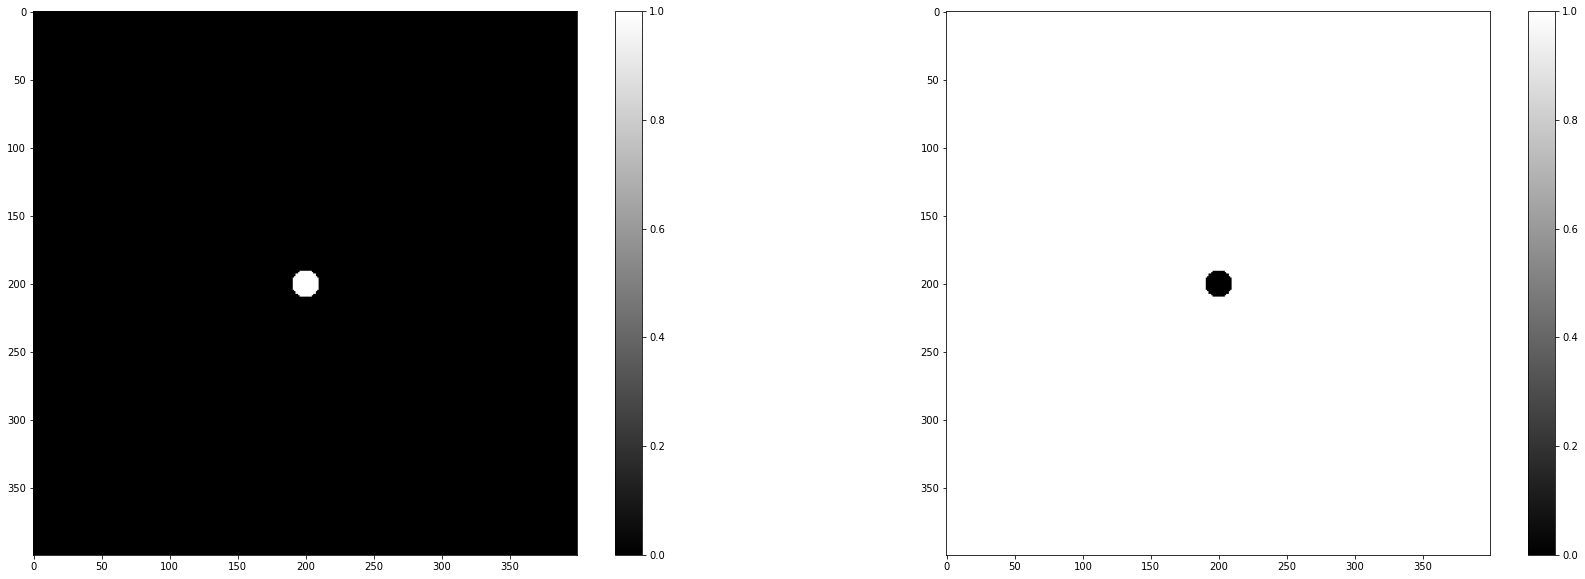

Diameter = 25

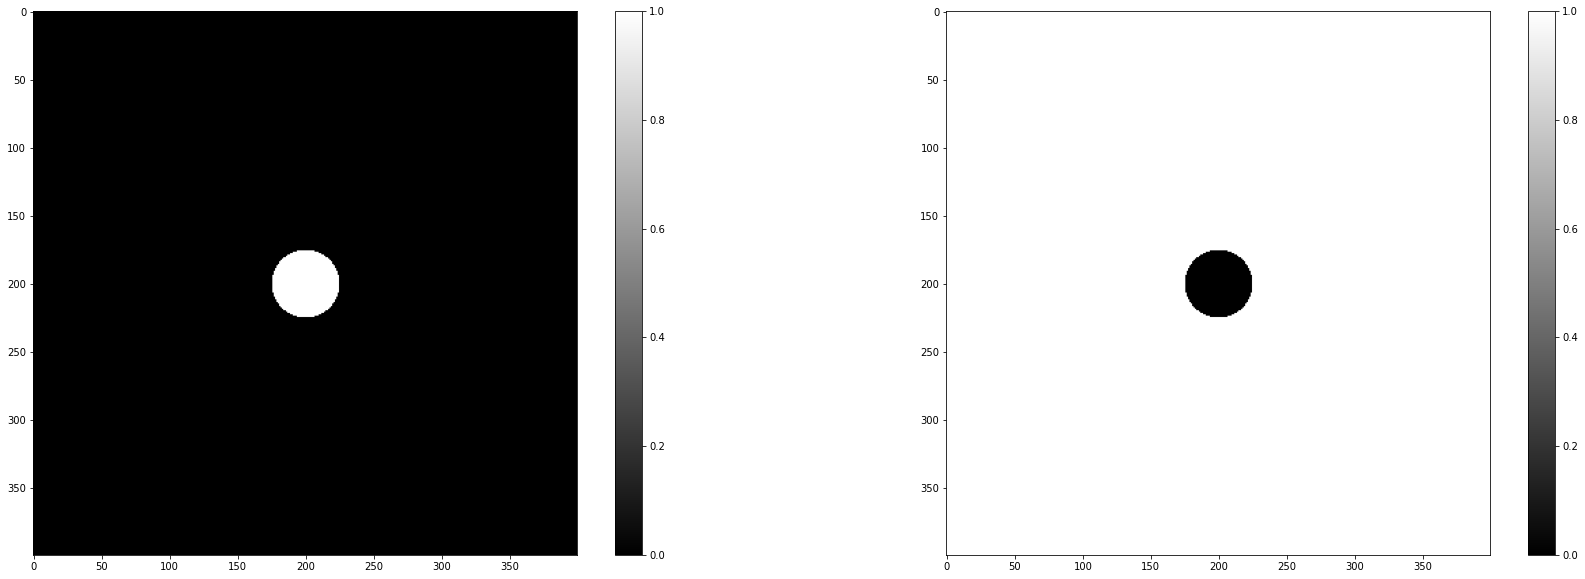

Diameter = 50

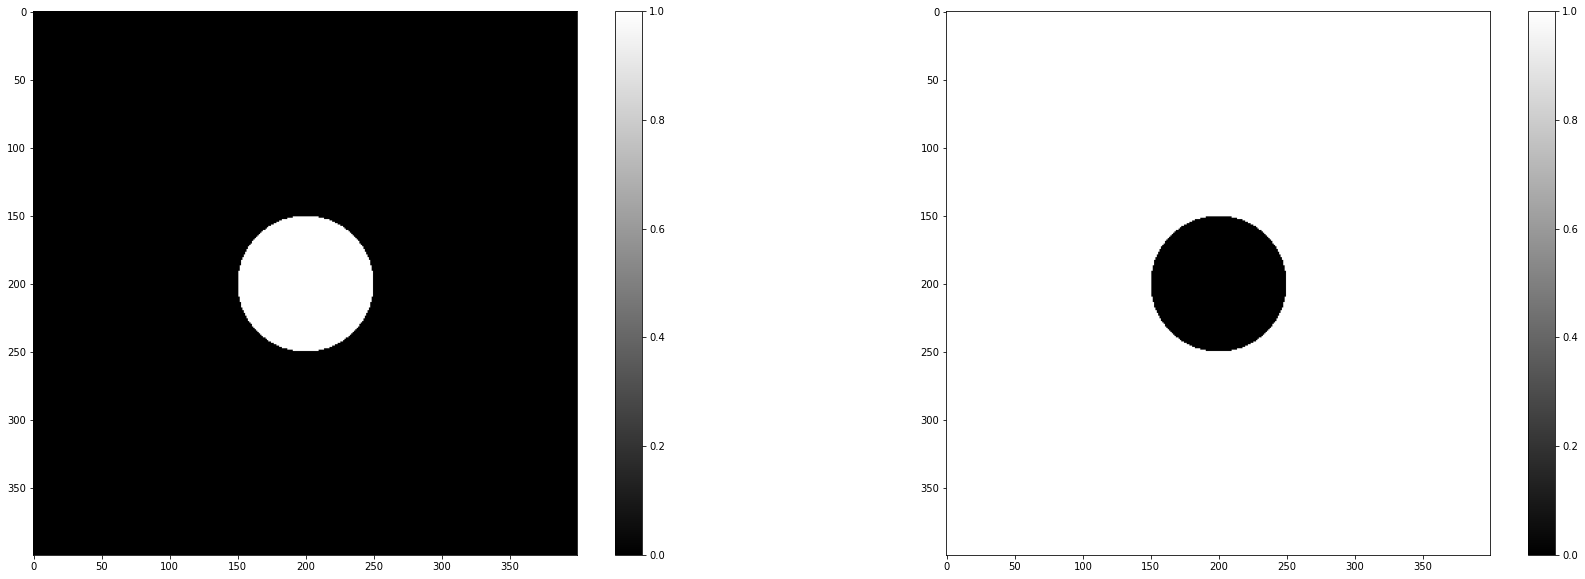

Diameter = 100

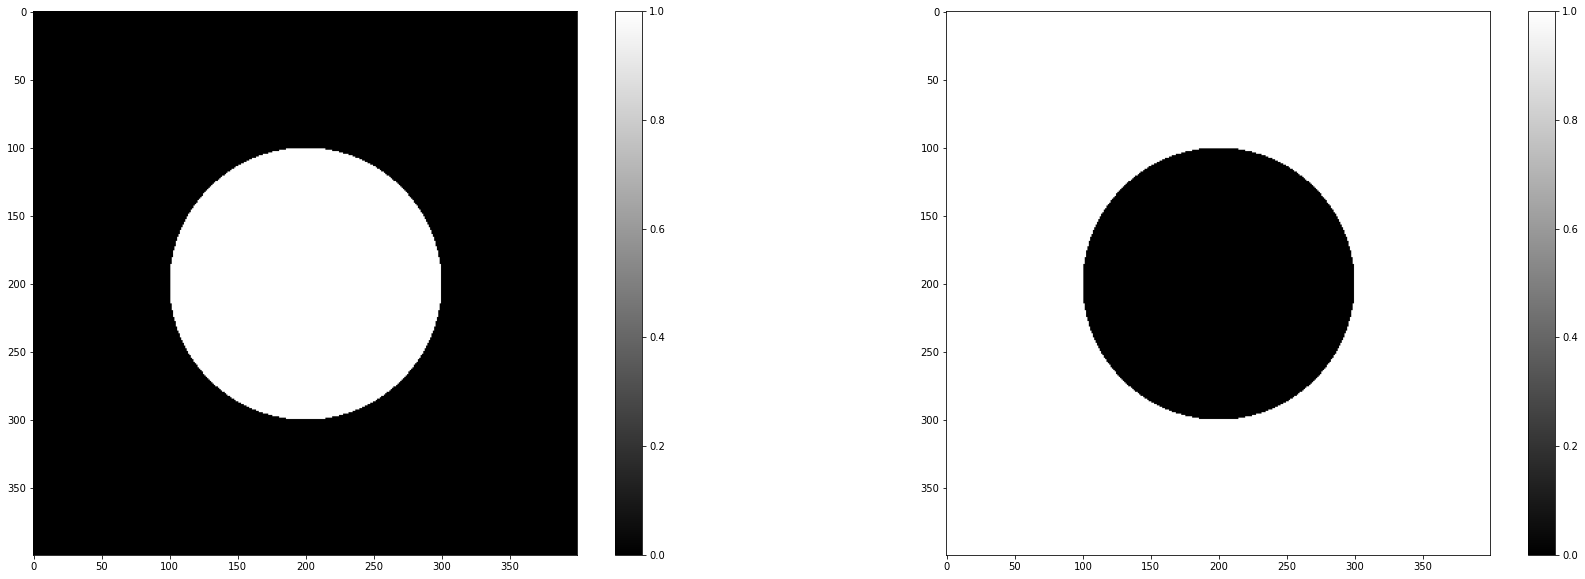

### OK. Now I will perform FFT on every channel.

In [ ]:
fft_img = np.zeros_like(img,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))

### From the FFT filter, I will create low pass filter, that only keeps low frequency FFT filter, and high pass filter, that only keeps high frequency FFT filter.

In [ ]:
def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    ## circle IN
    temp = filter_circle(TFcircleIN,fft_img_channel)
    fft_img_filtered_IN.append(temp)
    ## circle OUT
    temp = filter_circle(TFcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))

In [ ]:
abs_fft_img              = np.abs(fft_img)
abs_fft_img_filtered_IN  = np.abs(fft_img_filtered_IN)
abs_fft_img_filtered_OUT = np.abs(fft_img_filtered_OUT)

### Visualize FFT filter, low pass filter and high pass filter

In [ ]:
def imshow_fft(absfft):
    magnitude_spectrum = 20*np.log(absfft)
    return(ax.imshow(magnitude_spectrum,cmap="gray"))

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
fontsize = 15 
for ichannel, color in enumerate(["R","G","B"]):
    ax = axs[0,ichannel]
    ax.set_title(color)
    im = imshow_fft(abs_fft_img[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("original DFT",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    
    ax = axs[1,ichannel]
    im = imshow_fft(abs_fft_img_filtered_IN[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT + low pass filter",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    ax = axs[2,ichannel]
    im = imshow_fft(abs_fft_img_filtered_OUT[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT + high pass filter",fontsize=fontsize)   
    fig.colorbar(im,ax=ax)
    
plt.show()

Diameter = 10

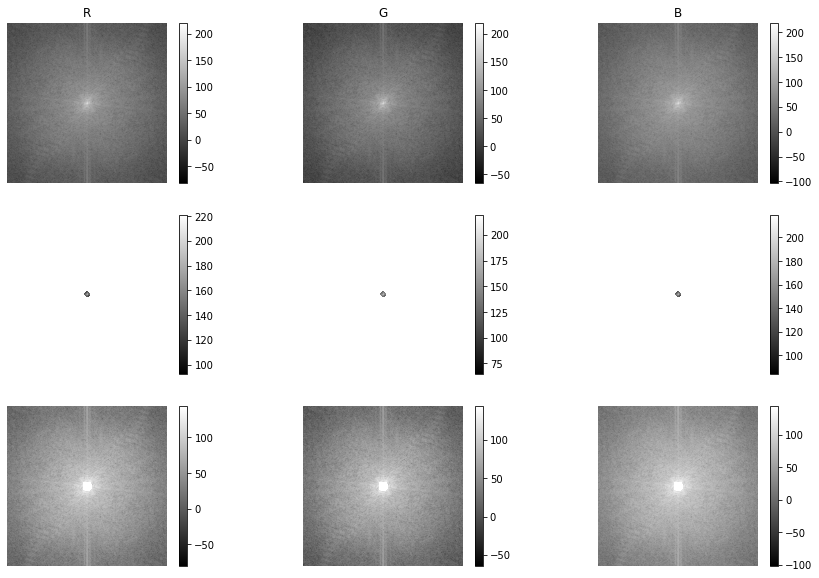

Diameter = 25

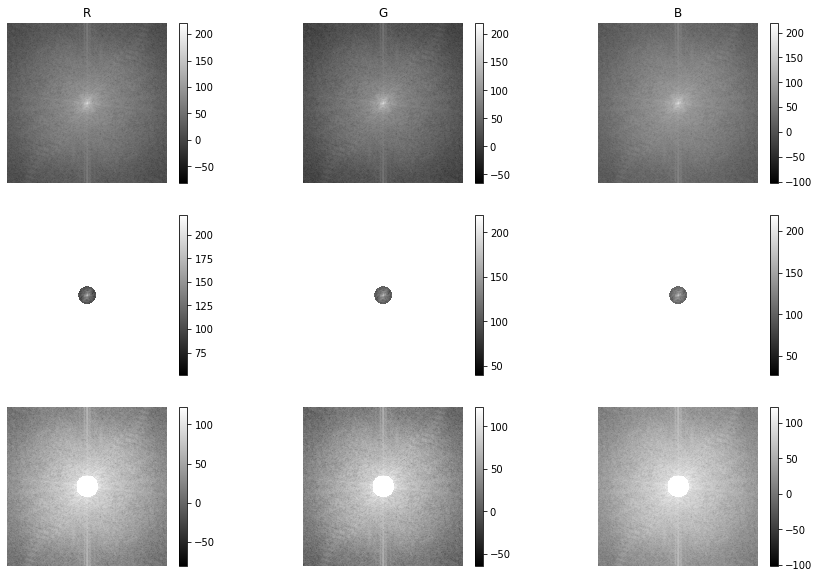

Diameter = 50

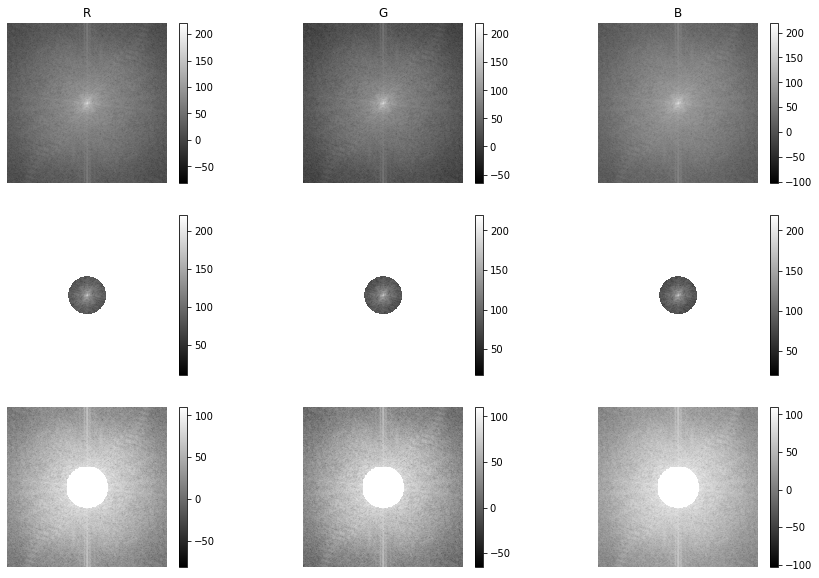

Diameter = 100

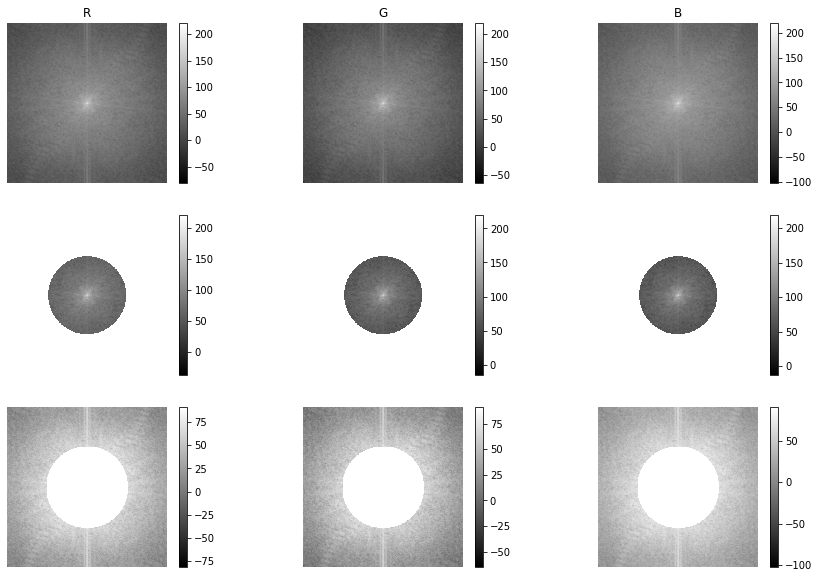

### Finally, filter the original image and inverse-FFT the image

*   Low Pass Filtering blurs the image.
*   High Pass Filtering is an edge detection operation.

This also shows that most of the image data is present in the Low frequency region of the spectrum.

In [ ]:
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

img_sharpen = img_reco + img_reco_filtered_OUT

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,4,1)
ax.imshow(np.abs(img_reco))
ax.set_title("original image")

ax  = fig.add_subplot(1,4,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")


ax  = fig.add_subplot(1,4,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")

ax  = fig.add_subplot(1,4,4)
ax.imshow(np.abs(img_sharpen))
ax.set_title("apply high pass filter")
plt.show()

Diameter = 10

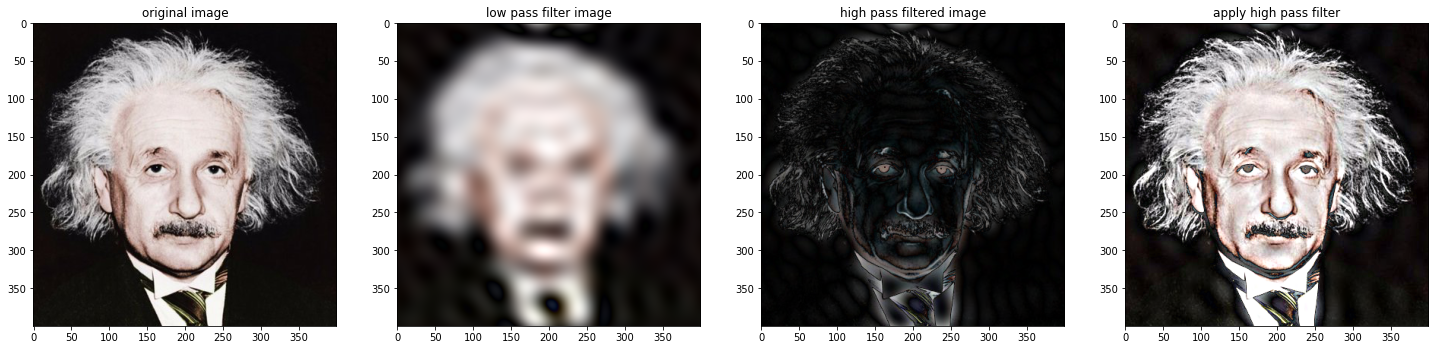

Diameter = 25

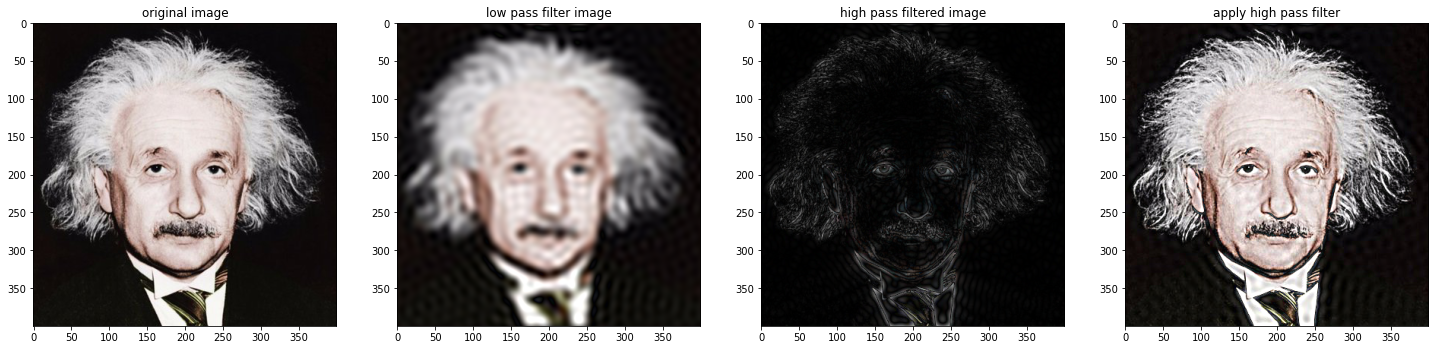

Diameter = 50

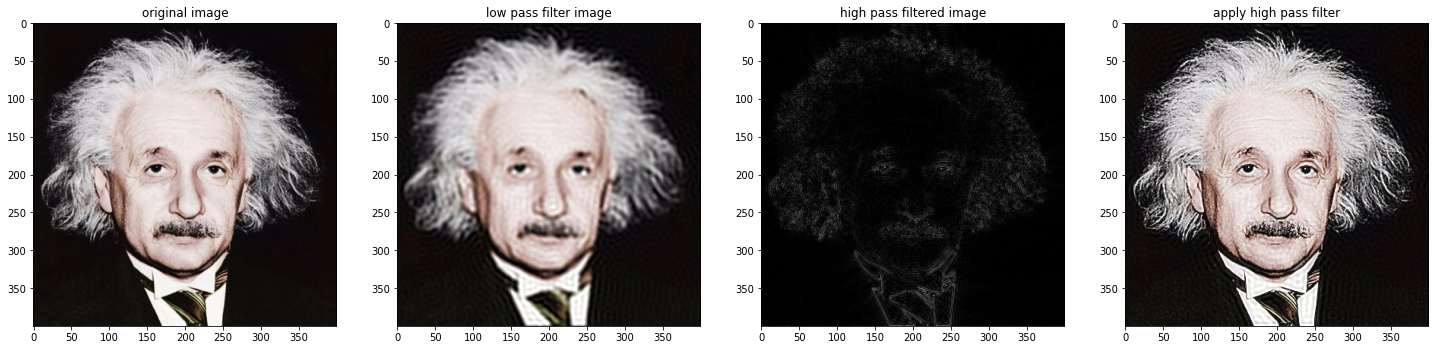

Diameter = 100

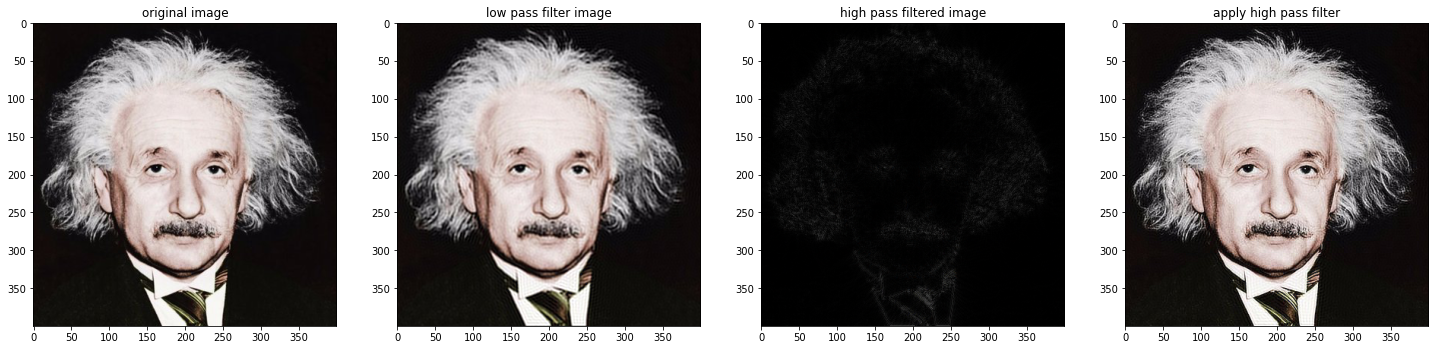

As a result if we increase diameter for low-pass filterring, we will see that image will be clear and sharp appoach to original at diameter = 10 you will see image is blurred because diameter is less it make images are less filtered.In high-pass filterring if  diameter is small, it means less filtering allows more borders to pass through, and when the original image is brought back in it makes the borders more visible, at diameter = 10 you will see the border of Einstein's image are sharper.

### Reference

Yumi. (2018, September 23). **Low and High pass filtering on images using FFT**. Retrieved September 16, 2021, from fairyonice.github.io website: https://fairyonice.github.io/Low-and-High-pass-filtering-experiments.html

‌